In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Load the data set

In [2]:
path=r"C:\Users\Sagar Guttal\Desktop\Data analysis(Netz)\End to end projects\Flight rate predictions\Datasets\Data_Train.xlsx"
data=pd.read_excel(path)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Data preprocessing

* cheching null values

In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* Only one null values in two column just drop that column

In [6]:
data.dropna(axis=0,how="any",inplace=True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Exploratory data analysis

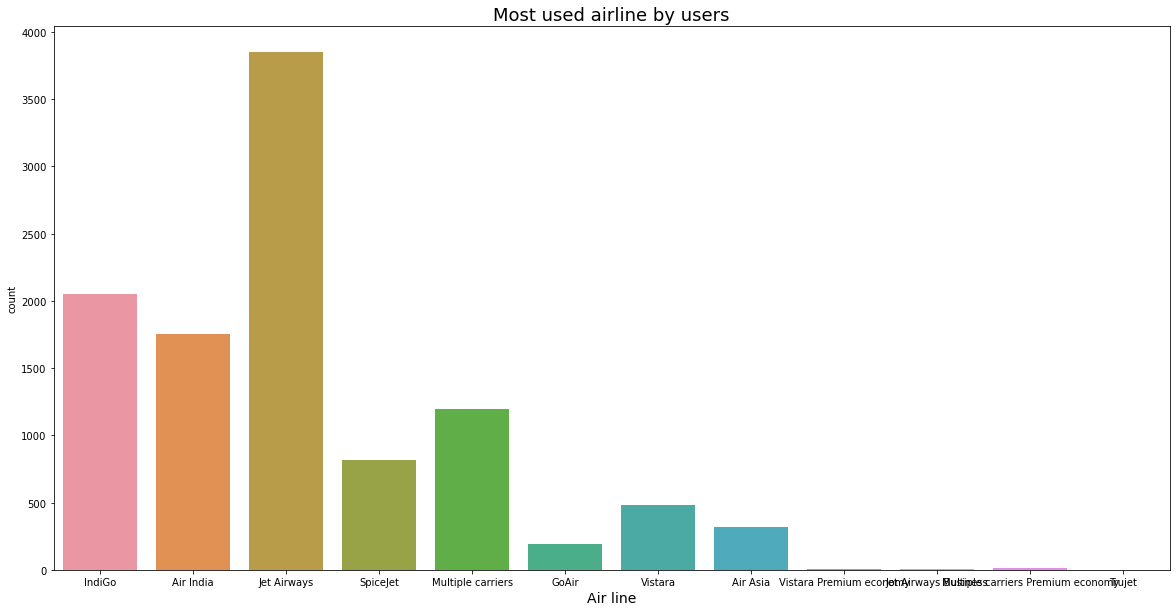

In [8]:
plt.figure(figsize=(20,10))
plt.title("Most used airline by users",fontsize=18)
sns.countplot(x="Airline",data=data)
plt.xlabel("Air line",fontsize=14)
plt.ylabel("count")
plt.show()

### Observations
* Jet airlines are most used airline

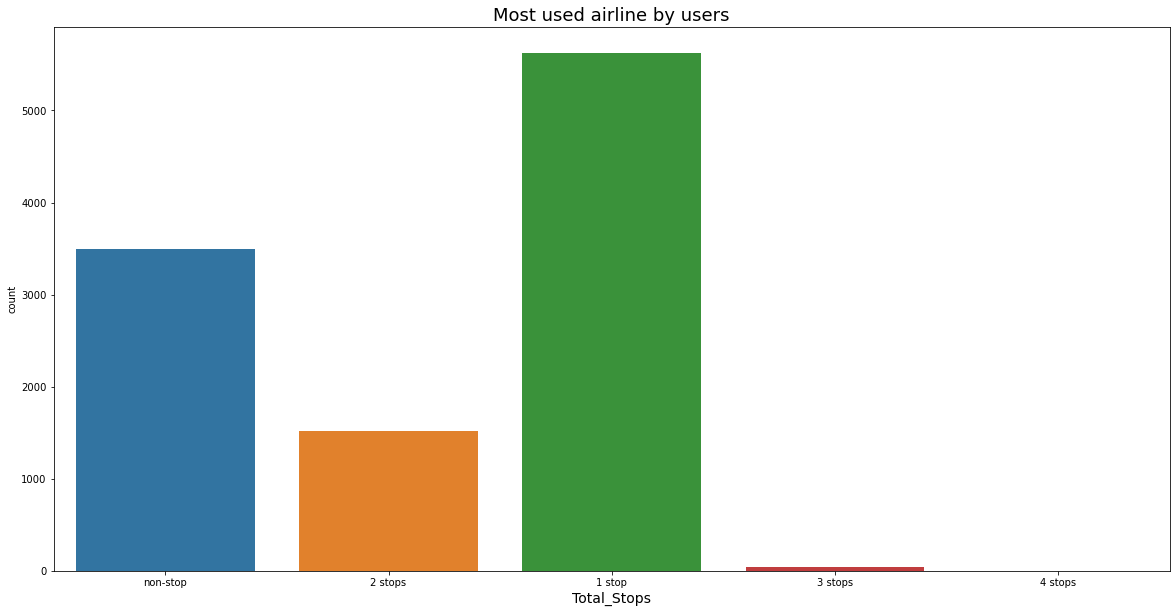

In [9]:
plt.figure(figsize=(20,10))
plt.title("Most used airline by users",fontsize=18)
sns.countplot(x="Total_Stops",data=data)
plt.xlabel("Total_Stops",fontsize=14)
plt.ylabel("count")
plt.show()

### Observations 
* Most of airpline are one stops
* Second most airlines are Non-stops

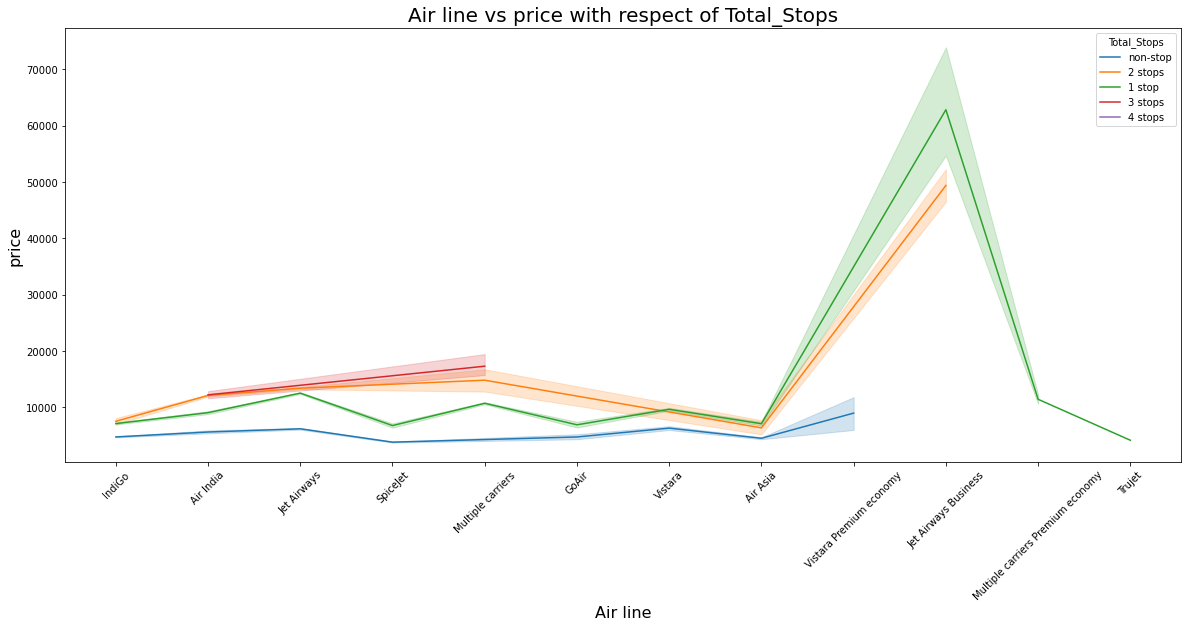

In [10]:
plt.figure(figsize=(20,8))
plt.title("Air line vs price with respect of Total_Stops",fontsize=20)
sns.lineplot(x="Airline",y="Price",hue="Total_Stops",data=data)
plt.xlabel("Air line",fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("price",fontsize=16)
plt.show()

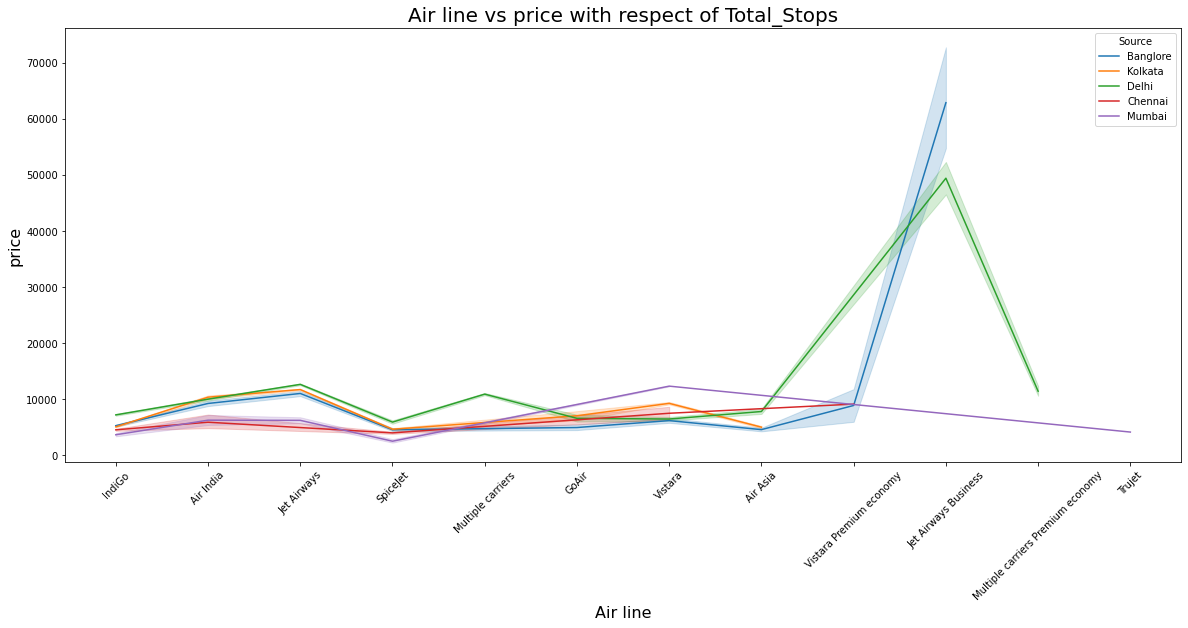

In [11]:
plt.figure(figsize=(20,8))
plt.title("Air line vs price with respect of Total_Stops",fontsize=20)
sns.lineplot(x="Airline",y="Price",hue="Source",data=data)
plt.xlabel("Air line",fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("price",fontsize=16)
plt.show()

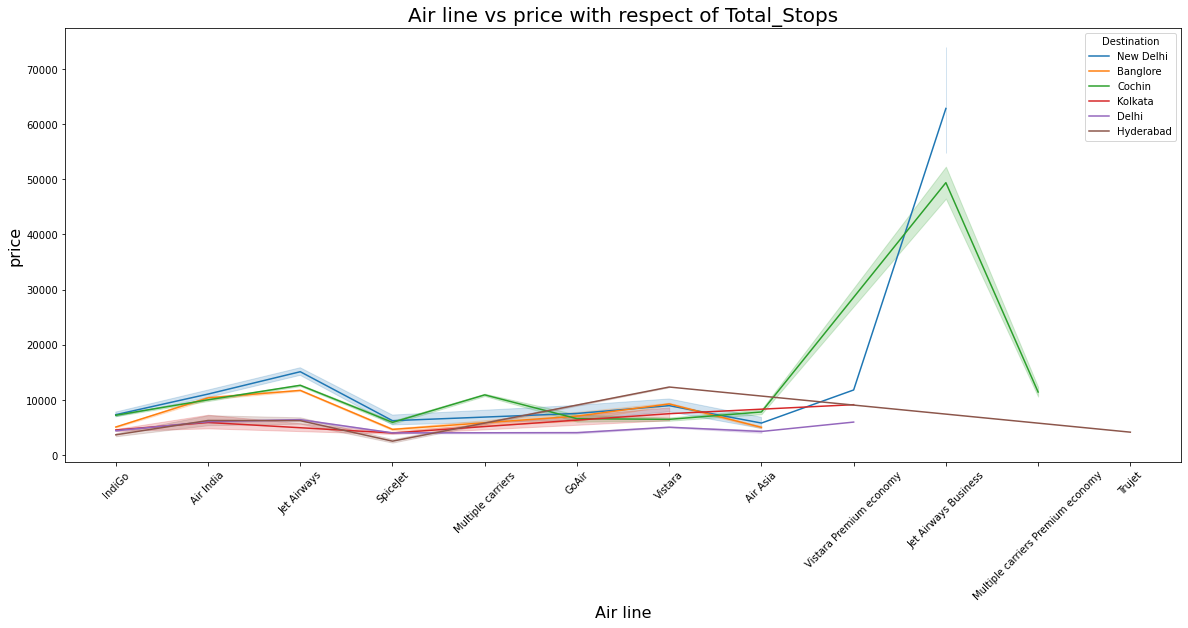

In [12]:
plt.figure(figsize=(20,8))
plt.title("Air line vs price with respect of Total_Stops",fontsize=20)
sns.lineplot(x="Airline",y="Price",hue="Destination",data=data)
plt.xlabel("Air line",fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("price",fontsize=16)
plt.show()

### Check the feature importance to price

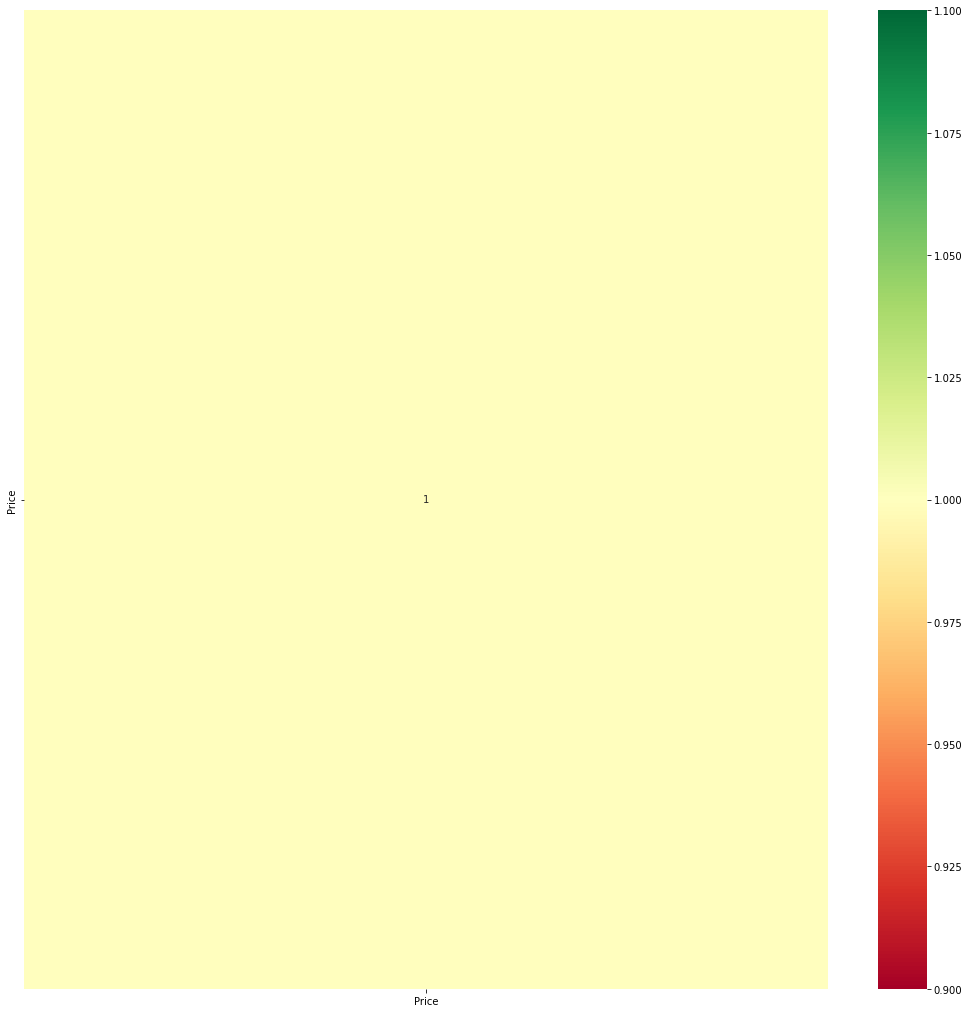

In [13]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()

## Handleing categorical values

In [14]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
Airline = data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [16]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
Source = data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [18]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
Destination = data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [20]:
data.replace({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}, inplace = True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [21]:
#  Concatenate dataframe
data_1 = pd.concat([data, Airline, Source, Destination],axis=1)
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,0,0,0,0,0,0,0,0,0,1


In [22]:
data_1.drop(columns=['Airline','Source','Destination','Additional_Info','Route'],inplace=True)
data_1.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
data_1["Journey date"]=pd.to_datetime(data_1.Date_of_Journey,format="%d/%m/%Y").dt.day
data_1["Journey month"]=pd.to_datetime(data_1.Date_of_Journey,format="%d/%m/%Y").dt.month

In [24]:
data_1["Dep_hr"]=pd.to_datetime(data_1.Dep_Time).dt.hour
data_1["Dep_min"]=pd.to_datetime(data_1.Dep_Time).dt.minute

In [25]:
data_1["Arrival_hour"]=pd.to_datetime(data_1.Arrival_Time).dt.hour
data_1["Arrival_min"]=pd.to_datetime(data_1.Arrival_Time).dt.minute

In [26]:
duration=list(data_1["Duration"])

for line in range (len(duration)):
    if len(duration[line].split()) != 2:
        if "h" in duration[line]:
            duration[line]=duration[line].strip() + " 0m"
        else :
            duration[line]="0h " + duration[line]
                     
duration_hours=[]
duration_mins=[]
                     
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(float(duration[i].split(sep="m")[0].split()[-1]))

In [27]:
data_1['Duration_hours'] = duration_hours
data_1['Duration_mins'] = duration_mins

In [28]:
data_1.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,1,24,3,22,20,1,10,2,50.0
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,1,5,5,50,13,15,7,25.0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,9,6,9,25,4,25,19,0.0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,12,5,18,5,23,30,5,25.0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,1,1,3,16,50,21,35,4,45.0


In [29]:
data_1.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time","Duration"],axis=1,inplace=True)

In [30]:
data_1

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,0,0,1,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50.0
1,2,7662,1,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25.0
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0.0
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25.0
4,1,13302,0,0,1,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,0,0,0,0,0,0,0,0,...,0,0,9,4,19,55,22,25,2,30.0
10679,0,4145,1,0,0,0,0,0,0,0,...,0,0,27,4,20,45,23,20,2,35.0
10680,0,7229,0,0,0,1,0,0,0,0,...,0,0,27,4,8,20,11,20,3,0.0
10681,0,12648,0,0,0,0,0,0,0,0,...,0,1,1,3,11,30,14,10,2,40.0


In [31]:
data_1.columns

Index(['Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey date',
       'Journey month', 'Dep_hr', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

### Split the data into X and Y

In [32]:
X=data_1.drop(columns=["Price"])
X.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50.0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25.0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0.0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25.0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45.0


In [33]:
y = data_1['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Select the model

In [35]:
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor

In [36]:
def model_selection(model):
    model=RandomForestRegressor()
    model.fit(x_train,y_train)
    model.predict(x_test)
    score= model.score(x_test,y_test)
    return score

In [37]:
model_selection(RandomForestRegressor)

0.8090816795401028

In [38]:
model_selection(GradientBoostingRegressor)

0.8096749896041835

In [39]:
model_selection(AdaBoostRegressor)

0.8121104263184086

In [40]:
models=[RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor]
model_scores=[]
for model in models:
    model_scores.append(model_selection(model))
    

In [41]:
base_model_performance=pd.DataFrame({
    "model name": ["Random forest regressor","Gradientboosting regressor","AdaBoosting Regressor"],
    "Model score": model_scores
})

In [42]:
base_model_performance

,model name,Model score
0,Random forest regressor,0.810297
1,Gradientboosting regressor,0.812732
2,AdaBoosting Regressor,0.809779


## Using K-fold crossvalidation technique check accuracy

In [43]:
from sklearn.model_selection import cross_val_score

In [47]:
score_1=cross_val_score(estimator=RandomForestRegressor(),X=x_train,y=y_train,cv=10)
score_2=cross_val_score(estimator=GradientBoostingRegressor(),X=x_train,y=y_train,cv=10)
score_3=cross_val_score(estimator=AdaBoostRegressor(),X=x_train,y=y_train,cv=10)

In [48]:
After_kfold_score=[np.mean(score_1),np.mean(score_2),np.mean(score_3)]

In [49]:
base_model_performance=pd.DataFrame({
    "model name": ["Random forest regressor","Gradientboosting regressor","AdaBoosting Regressor"],
    "before k-fold Model score": model_scores,
    "after k-fold Model score": After_kfold_score
})

In [50]:
base_model_performance

,model name,before k-fold Model score,after k-fold Model score
0,Random forest regressor,0.810297,0.810987
1,Gradientboosting regressor,0.812732,0.769138
2,AdaBoosting Regressor,0.809779,0.224194


## Hyperparameter tuning for Random forest regressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV


In [53]:
param_distrubutions={
    'n_estimators':np.arange(100,301,20),
    'max_depth':np.arange(4,12),
    'max_features':np.arange(5,11),
    'min_samples_leaf':np.arange(1,5)
}

estimator=RandomForestRegressor()

In [54]:
rs=RandomizedSearchCV(estimator,param_distrubutions,cv=10)

In [55]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'n_estimators': array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])})

In [56]:
rs.best_params_

{'n_estimators': 220,
 'min_samples_leaf': 4,
 'max_features': 9,
 'max_depth': 11}

In [57]:
rs.best_estimator_

RandomForestRegressor(max_depth=11, max_features=9, min_samples_leaf=4,
                      n_estimators=220)

## Building final model

In [58]:
final_model=RandomForestRegressor(max_depth=11, max_features=9, min_samples_leaf=4,
                      n_estimators=220)
final_model.fit(x_train,y_train)
final_predictions=final_model.predict(x_test)

In [59]:
y_test[0:10]

10507    14781
7705      5636
7700      3597
1437     16757
8884      4804
4041      8586
9635     12242
7620      7001
5842      4030
5867     11948
Name: Price, dtype: int64

In [60]:
final_predictions[0:10]

array([12400.13264442,  6129.18142886,  3663.55245945, 13061.48954051,
        4752.23922785, 11486.30395721, 10467.30233332,  7690.56828038,
        6544.18562394, 11089.82907686])

In [61]:
final_model.score(x_test,y_test)

0.7516064774090878